<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

In [2]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [15]:
crop_data.shape

#rows X columns

(246091, 7)

In [16]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [17]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [4]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
# Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [20]:
#checking
crop_data.isnull().values.any()


False

In [21]:
# Displaying State Names present in the dataset
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [10]:
# Adding a new column Yield which indicates Production per unit Area. 

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\416474790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [12]:
# Dropping unnecessary columns

crop_data = crop_data.loc[crop_data['State_Name']=='Maharashtra']

data = crop_data.drop(['State_Name', 'Crop_Year'], axis = 1)

In [13]:
data.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Area,Production,Yield
Area,1.000000,0.167837,-0.006498
Production,0.167837,1.000000,0.280558
Yield,-0.006498,0.280558,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\1522484008.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

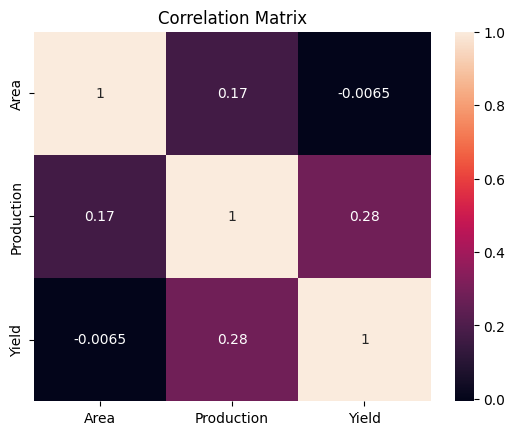

In [14]:
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

In [15]:
dummy = pd.get_dummies(data)
dummy


,Area,Production,Yield,District_Name_AHMEDNAGAR,District_Name_AKOLA,District_Name_AMRAVATI,District_Name_AURANGABAD,District_Name_BEED,District_Name_BHANDARA,District_Name_BULDHANA,...,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Urad,Crop_Wheat,Crop_other oilseeds
125191,1.0,1113.0,1113.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125192,17600.0,6300.0,0.357955,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125193,274100.0,152800.0,0.557461,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125194,40800.0,18600.0,0.455882,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125195,900.0,1100.0,1.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,4000.0,3300.0,0.825000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137815,1300.0,200.0,0.153846,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137816,29100.0,26800.0,0.920962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
137817,9400.0,11500.0,1.223404,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b><i> Splitting dataset into train and test dataset </i></b>

In [16]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (9372, 75)
x_test : (3124, 75)
y_train : (9372,)
y_test : (3124,)


In [17]:
print(x_train)
print(y_train)

            Area  District_Name_AHMEDNAGAR  District_Name_AKOLA  \
137799  285600.0                         0                    0   
129278    1900.0                         0                    0   
129035     500.0                         0                    0   
136500    1000.0                         0                    0   
130424    1700.0                         0                    0   
...          ...                       ...                  ...   
128265  179800.0                         0                    0   
135201   13700.0                         0                    0   
129307  113500.0                         0                    0   
127470    6795.0                         0                    0   
128134    1700.0                         0                    0   

        District_Name_AMRAVATI  District_Name_AURANGABAD  District_Name_BEED  \
137799                       0                         0                   0   
129278                       0     

<b><h3> Linear Regression </b></h3>

In [18]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([-111382.69279615,  -91011.76537654,   35276.19366002, ...,
        -25773.08389359,  -73123.89554851,  -64968.94310026])

In [20]:
model.score(x_test,y_test)

0.3776273901524858

In [21]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.3776273901524858


Text(0.5, 1.0, 'Linear Regression')

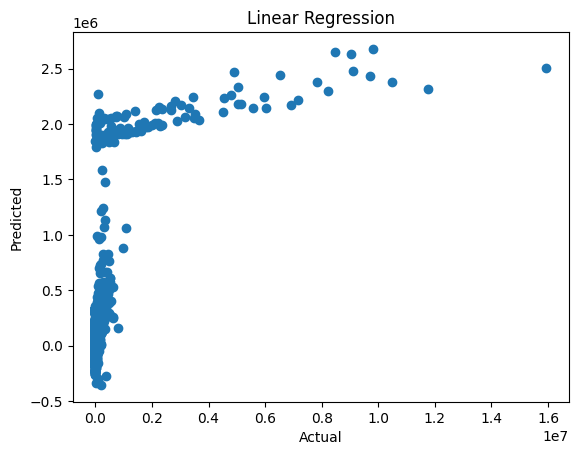

In [22]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


# R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. 
# This tells us how well the unknown samples will be predicted by our model.

<b><h3> Random Forest Algorithm </h3></b>

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([   91.81818182,   365.15151515,    42.66258035, ...,
       26527.27272727,    31.54545455,   345.87878788])

In [24]:
model.score(x_test,y_test)

0.9406125135297624

In [25]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9406125135297624


In [26]:
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.36231310349285206


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

Text(0.5, 1.0, 'Random Forest Regression')

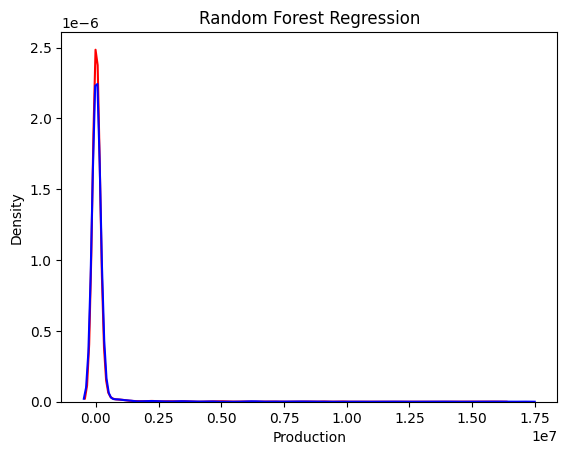

In [27]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b> 



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

<b> Decision Tree </b>

In [28]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([1.00000000e+02, 4.00000000e+02, 3.04285714e+01, ...,
       2.47000000e+04, 1.00000000e+01, 3.00000000e+02])

In [29]:
regressor.score(x_test,y_test)

0.9224345213747314

In [30]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9224345213747314


In [31]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.36231310349285206


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\697514152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8620\697514152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

Text(0.5, 1.0, 'Decision Tree Regression')

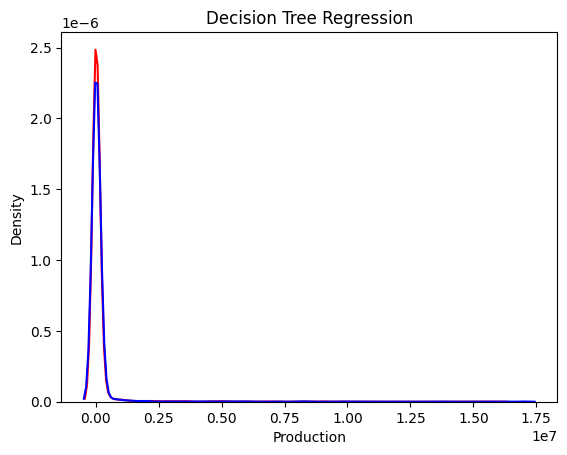

In [32]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

In [33]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3124 entries, 136935 to 133983
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Area                          3124 non-null   float64
 1   District_Name_AHMEDNAGAR      3124 non-null   uint8  
 2   District_Name_AKOLA           3124 non-null   uint8  
 3   District_Name_AMRAVATI        3124 non-null   uint8  
 4   District_Name_AURANGABAD      3124 non-null   uint8  
 5   District_Name_BEED            3124 non-null   uint8  
 6   District_Name_BHANDARA        3124 non-null   uint8  
 7   District_Name_BULDHANA        3124 non-null   uint8  
 8   District_Name_CHANDRAPUR      3124 non-null   uint8  
 9   District_Name_DHULE           3124 non-null   uint8  
 10  District_Name_GADCHIROLI      3124 non-null   uint8  
 11  District_Name_GONDIA          3124 non-null   uint8  
 12  District_Name_HINGOLI         3124 non-null   uint8  
 

In [34]:
import pickle

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

136935       10.0
125736      600.0
134797       10.0
136394    22200.0
126877     2700.0
           ...   
137516      300.0
126294        4.0
128398    26300.0
127875       19.0
133983      300.0
Name: Production, Length: 3124, dtype: float64